<a href="https://colab.research.google.com/github/aniilkeles/Machine-Learning-Projects/blob/main/LinearRegression/20_PolynomialRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/3-customersatisfaction.csv') #unnamed kolonu bu datayı oluşturan kişi index kolonunu unuttuduğundan dolayı olabilir

In [ ]:
df.head()

,Unnamed: 0,Customer Satisfaction,Incentive
0,0,-1.282447,1.010513
1,1,0.425298,2.281043
2,2,1.953070,4.415053
3,3,2.625838,10.563600
4,4,-1.426333,0.627365


In [ ]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [ ]:
df.head()

,Customer Satisfaction,Incentive
0,-1.282447,1.010513
1,0.425298,2.281043
2,1.953070,4.415053
3,2.625838,10.563600
4,-1.426333,0.627365


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Customer Satisfaction  100 non-null    float64
 1   Incentive              100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


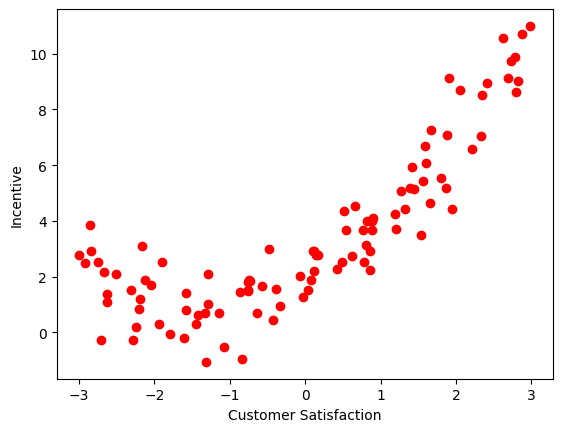

In [ ]:
plt.scatter(df['Customer Satisfaction'],df['Incentive'],color="r")
plt.xlabel("Customer Satisfaction")
plt.ylabel("Incentive")
plt.show()

In [ ]:
#yukarıda görüldüğü gibi dataset daha çok polinom gibi duruyor

In [ ]:
# dependent and independent features

X = df[['Customer Satisfaction']]
y = df['Incentive']

In [ ]:
X.head()

,Customer Satisfaction
0,-1.282447
1,0.425298
2,1.953070
3,2.625838
4,-1.426333


In [ ]:
y.head()

,Incentive
0,1.010513
1,2.281043
2,4.415053
3,10.563600
4,0.627365


In [ ]:
# test train split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=15)

In [ ]:
X_train

,Customer Satisfaction
99,0.512504
3,2.625838
20,-0.865714
55,-1.145369
6,2.823460
...,...
28,1.191020
0,-1.282447
5,-1.311432
12,0.490521


In [ ]:
#scaler

In [ ]:
scaler = StandardScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
regression = LinearRegression()

In [ ]:
regression.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred = regression.predict(X_test)

In [ ]:
y_pred

array([ 4.65663741,  3.71913877,  1.64121789,  6.29646523,  3.46766736,
        5.7580845 ,  4.692485  ,  3.61616231,  5.62448003,  0.13472702,
        4.47909659,  4.8130839 ,  1.58319087,  0.30515983,  5.27634309,
        0.41711005, -0.7385295 , -0.32653914,  3.55906887,  1.19798631])

In [ ]:
score = r2_score(y_test,y_pred)
print(score)

0.2705652535622246


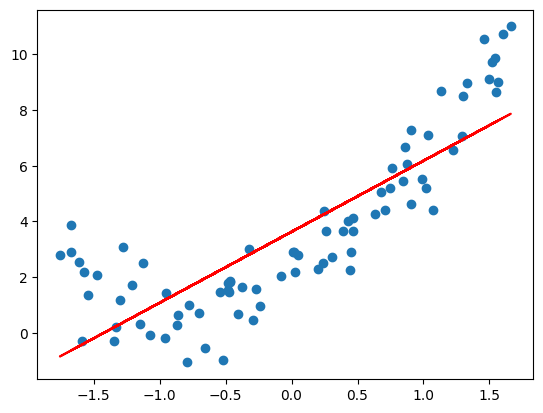

In [ ]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train),color="r")
plt.show()

In [ ]:
# Bu gibi durumlarda mesela yeni bir feature geldiğinde best fit line da en sona geldiğini düşünelim best fit lineda karşılığı daha az bir değer olacaktır bu gibi durumlarda linear rigression yetersiz kalıyor

In [ ]:
poly = PolynomialFeatures(degree =2 , include_bias = True) # degree ve imclude_bias zaten default değerler yazsakta olur yazmasakta intercepti ayarlamak için kullanılıyor include_bias degreede polinomun ne kadar
                                                           # dereceli olacağını

In [ ]:
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [ ]:
X_train_poly  # burda görülen 1 ler interceptler sonra bu 1 ler hesaplanıyor dataları yine linear regression a sokacaz sokmadan önce datayı değiştiriyoruz böylece regresyonda polinom hale gelmiş datayla çalışıyor

array([[ 1.00000000e+00,  2.47633535e-01,  6.13223675e-02],
       [ 1.00000000e+00,  1.45565669e+00,  2.11893639e+00],
       [ 1.00000000e+00, -5.40182671e-01,  2.91797318e-01],
       [ 1.00000000e+00, -7.00039198e-01,  4.90054879e-01],
       [ 1.00000000e+00,  1.56862116e+00,  2.46057233e+00],
       [ 1.00000000e+00,  9.87568378e-01,  9.75291302e-01],
       [ 1.00000000e+00,  4.48640749e-01,  2.01278522e-01],
       [ 1.00000000e+00,  1.54377517e+00,  2.38324178e+00],
       [ 1.00000000e+00,  1.33219938e+00,  1.77475518e+00],
       [ 1.00000000e+00, -4.80410926e-01,  2.30794658e-01],
       [ 1.00000000e+00,  3.92892957e-01,  1.54364876e-01],
       [ 1.00000000e+00, -6.57456685e-01,  4.32249293e-01],
       [ 1.00000000e+00,  4.42663768e-01,  1.95951211e-01],
       [ 1.00000000e+00, -8.72131603e-01,  7.60613533e-01],
       [ 1.00000000e+00, -1.57257044e+00,  2.47297780e+00],
       [ 1.00000000e+00, -4.70184630e-01,  2.21073587e-01],
       [ 1.00000000e+00, -8.36083500e-02

In [ ]:
regression = LinearRegression()
regression.fit(X_train_poly,y_train)

LinearRegression()

In [ ]:
y_pred = regression.predict(X_test_poly)
score = r2_score(y_test,y_pred)
print(score)

0.7685687698788557


In [ ]:
regression.coef_

array([0.        , 2.63871762, 1.54959954])

In [ ]:
regression.intercept_

np.float64(2.076676429793281)

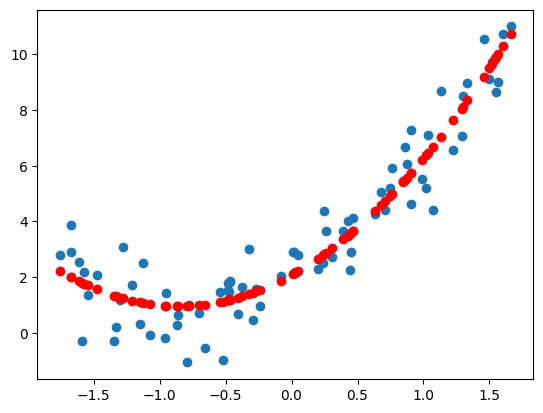

In [ ]:
plt.scatter(X_train,y_train)
plt.scatter(X_train,regression.predict(X_train_poly),color = "r")
plt.show()

In [ ]:
poly = PolynomialFeatures(degree = 3 , include_bias = True)

In [ ]:
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [ ]:
regression = LinearRegression()

In [ ]:
regression.fit(X_train_poly,y_train)

LinearRegression()

In [ ]:
y_pred = regression.predict(X_test_poly)
score = r2_score(y_test,y_pred)
print(score)

0.757344362140105


In [ ]:
# degree 2 de tutmak daha mantıklı oldu

In [ ]:
# new  data

In [ ]:
new_df = pd.read_csv('/content/drive/MyDrive/Dataset/3-newdatas.csv')

In [ ]:
new_df # sadece 200 tane customer satisfaction var bizden incentive bulmamız isteniyor

,0
0,-3.000000
1,-2.969849
2,-2.939698
3,-2.909548
4,-2.879397
...,...
195,2.879397
196,2.909548
197,2.939698
198,2.969849


In [ ]:
new_df.rename(columns={"0": "Customer Satisfaction"},inplace = True)

In [ ]:
new_df

,Customer Satisfaction
0,-3.000000
1,-2.969849
2,-2.939698
3,-2.909548
4,-2.879397
...,...
195,2.879397
196,2.909548
197,2.939698
198,2.969849


In [ ]:
X_new = new_df[["Customer Satisfaction"]]

In [ ]:
X_new = scaler.fit_transform(X_new)

In [ ]:
X_new_poly = poly.transform(X_new)

In [ ]:
y_new=regression.predict(X_new_poly)

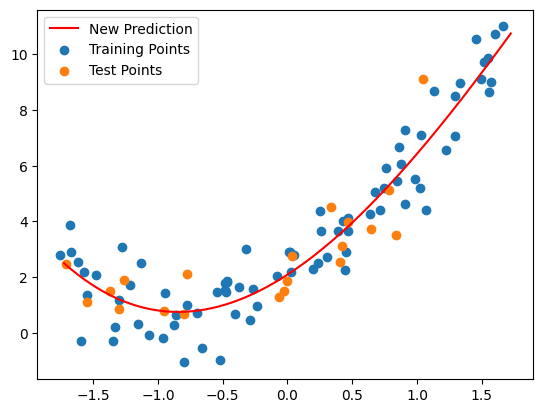

In [ ]:
plt.plot(X_new,y_new,"r",label="New Prediction")
plt.scatter(X_train,y_train,label="Training Points")
plt.scatter(X_test,y_test,label="Test Points")
plt.legend()
plt.show()

In [ ]:
# pipeline

In [ ]:
# pipeline yaptığımız şeyleri bir fonksiyon içine koyarak ardı ardına çalıştırmamıza olanak tanıyan bir fonksiyondur

In [ ]:
def poly_regression(degree):
  poly_features = PolynomialFeatures(degree=degree)  # polyfeatures içine verdiğimiz özelliklerle regresyonun içine verdiğimiz dataları değiştiriyoruz
  lin_reg = LinearRegression()
  scaler = StandardScaler()
  pipeline = Pipeline([
      ("standard_scaler",scaler),
      ("poly_features",poly_features),
      ("lin_reg",lin_reg)
  ] )

  pipeline.fit(X_train,y_train)
  score = pipeline.score(X_test,y_test)
  print("R2 score : ",score)


  y_pred_new = pipeline.predict(X_new)
  plt.plot(X_new,y_pred_new,"r",label="New Prediction")
  plt.scatter(X_train,y_train,label="Training Points")
  plt.scatter(X_test,y_test,label="Test Points")
  plt.legend()
  plt.show()

R2 score :  0.2705652535622246


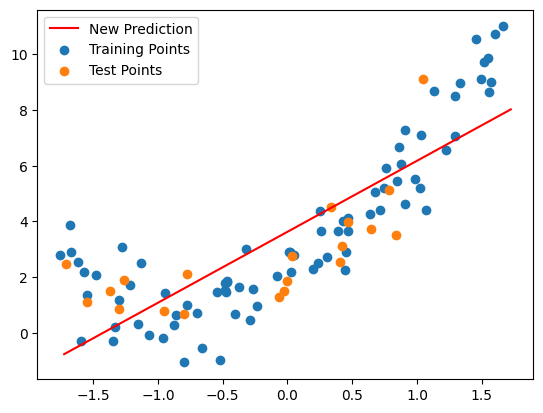

R2 score :  0.7685687698788557


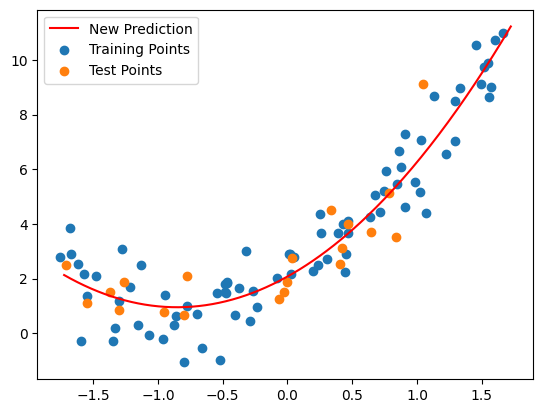

R2 score :  0.7573443621401048


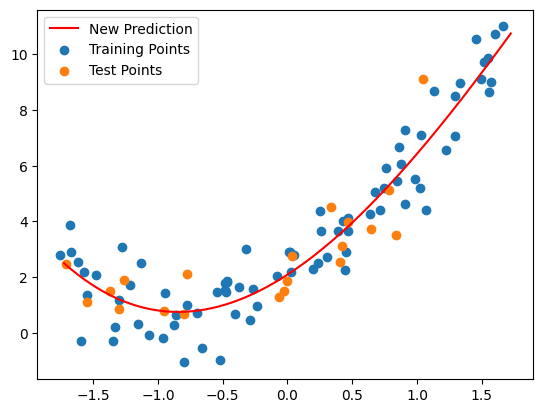

R2 score :  0.7355034443260413


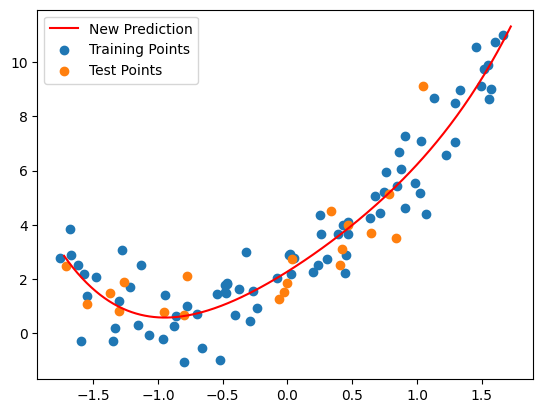

R2 score :  0.73512441650954


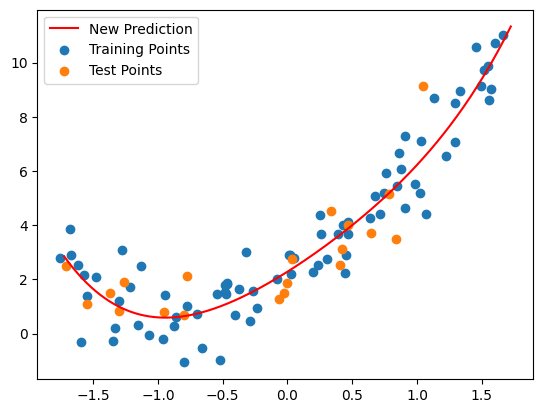

R2 score :  0.7343590482133435


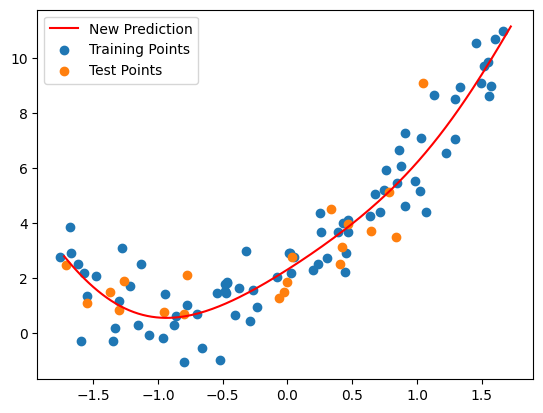

R2 score :  0.7347819263549452


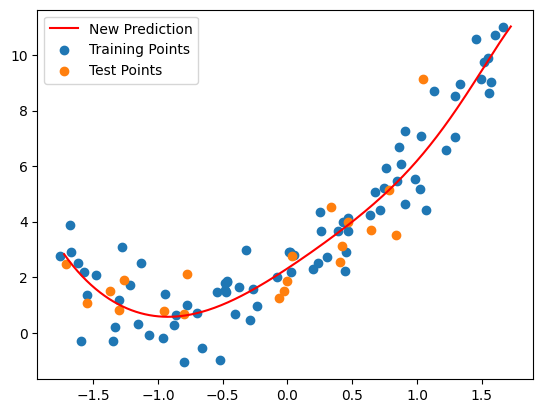

R2 score :  0.7411422099998375


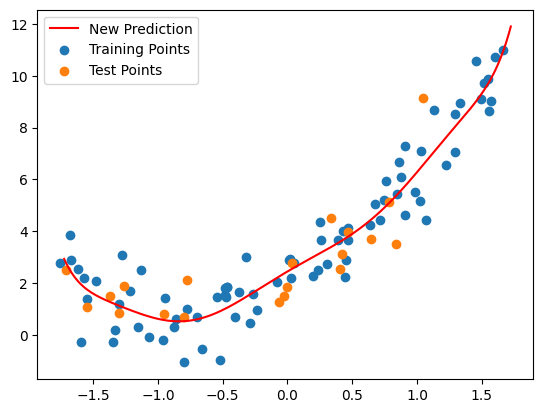

R2 score :  0.7310763879815911


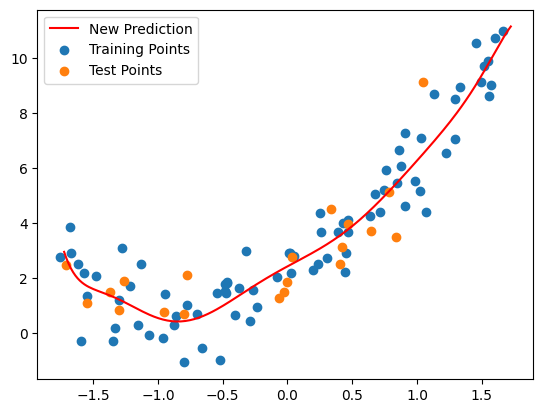

R2 score :  0.7280578621232836


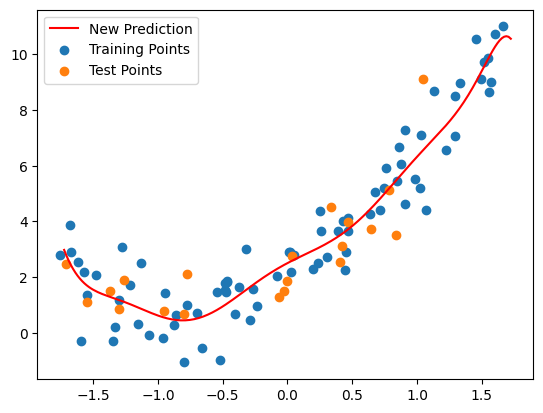

In [ ]:
for degree in [1,2,3,4,5,6,7,8,9,10]:
  poly_regression(degree)